# Kurjenmiekk (Iris) harjoitus

## 1. Tavoitteet

Tavoiteena on oppia mallitamaan päätöpuun.



## 2. Datan tarkastelu, muokkaaminen, siivoaminen, kuvantaminen ja analysointi

Esitä muuttujat ja tietotyypit.

Mikä on datan koko?

Onko puuttuvia tai poikkeavia arvoja?

Mitä datasta voi päätellä?


In [69]:
import pandas as pd
import seaborn as sns

In [70]:
data = sns.load_dataset('iris')
data.head(15)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [71]:
data.shape

(150, 5)

In [72]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [73]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [74]:
data['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [75]:
korr = data.loc[:,'sepal_length':'petal_width'].corr()
korr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

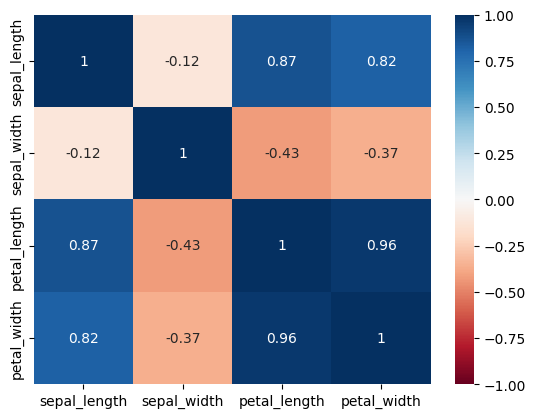

In [76]:
sns.heatmap(korr, vmin=-1.0, vmax=1.0, cmap='RdBu', annot=True)

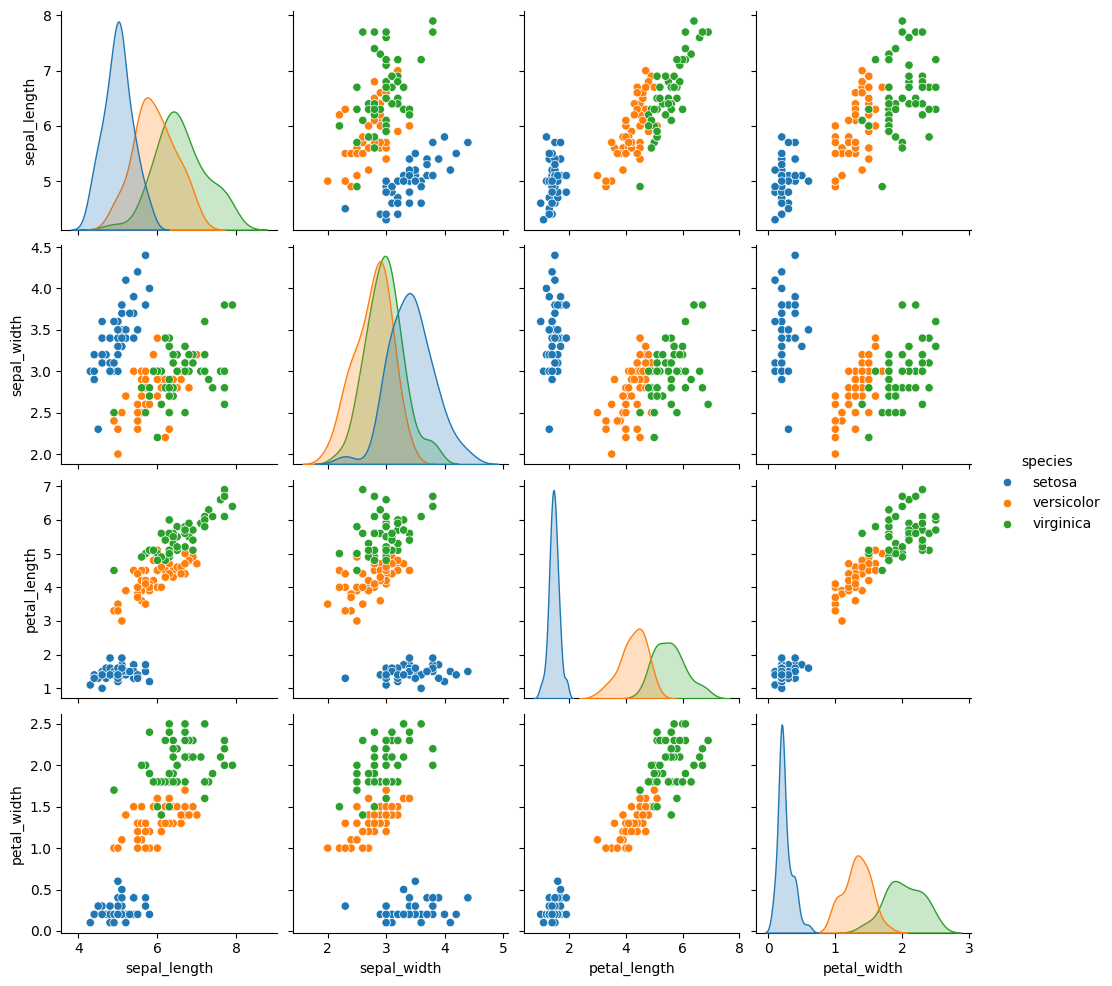

In [77]:
sns.pairplot(data=data, hue='species')

## 3. Datan valmistelu

Miten data esikäsitellään mallinnusta varten?

Jaetaanko data mallin kouluttamisdataan ja testidataan?




In [78]:
colnames = data.columns
colnames

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [79]:
#selittävät muutujat
X = data.loc[:, 'sepal_length':'petal_width']
X


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [80]:
Y = data.loc[:, 'species']
Y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


## 4. Mallinnus

Millä menetelmillä data analysoidaan? Miksi juuri tämä menetelmä on valittu?

Millä parametreillä?

Mitä tuloksia analyysistä saadaan?



In [82]:
#pip install -U scikit-learn
from sklearn import tree

In [83]:
classifier = tree.DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [84]:
tree.export_graphviz(classifier)

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="x[3] <= 0.8\\ngini = 0.667\\nsamples = 120\\nvalue = [40, 41, 39]"] ;\n1 [label="gini = 0.0\\nsamples = 40\\nvalue = [40, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="x[2] <= 4.75\\ngini = 0.5\\nsamples = 80\\nvalue = [0, 41, 39]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="x[3] <= 1.65\\ngini = 0.053\\nsamples = 37\\nvalue = [0, 36, 1]"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 36\\nvalue = [0, 36, 0]"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]"] ;\n3 -> 5 ;\n6 [label="x[3] <= 1.75\\ngini = 0.206\\nsamples = 43\\nvalue = [0, 5, 38]"] ;\n2 -> 6 ;\n7 [label="gini = 0.5\\nsamples = 8\\nvalue = [0, 4, 4]"] ;\n6 -> 7 ;\n8 [label="gini = 0.056\\nsamples = 35\\nvalue = [0, 1, 34]"] ;\n6 -> 8 ;\n}'

In [85]:
print(tree.export_text(classifier, feature_names=colnames[:4]))

|--- petal_width <= 0.80
|   |--- class: setosa
|--- petal_width >  0.80
|   |--- petal_length <= 4.75
|   |   |--- petal_width <= 1.65
|   |   |   |--- class: versicolor
|   |   |--- petal_width >  1.65
|   |   |   |--- class: virginica
|   |--- petal_length >  4.75
|   |   |--- petal_width <= 1.75
|   |   |   |--- class: versicolor
|   |   |--- petal_width >  1.75
|   |   |   |--- class: virginica



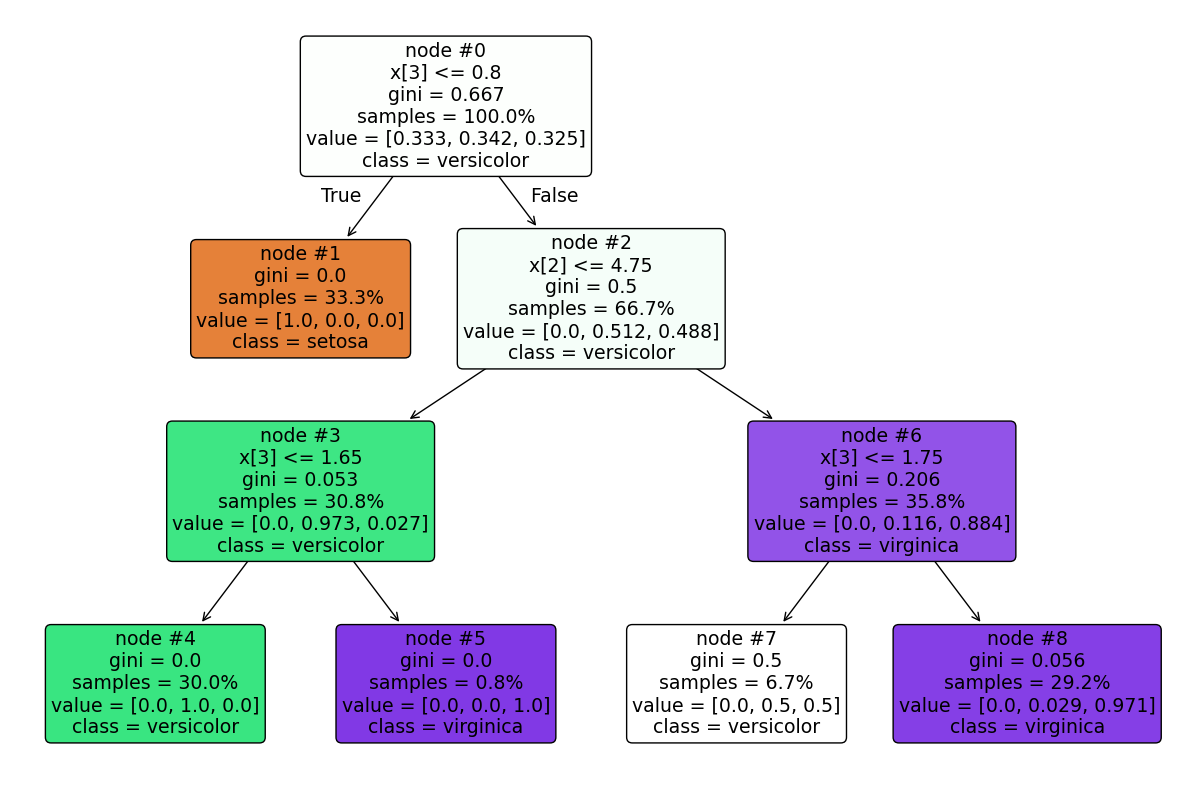

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
tree.plot_tree(classifier, node_ids=True, class_names=classifier.classes_, filled=True, proportion=True, rounded=True)
plt.show()

In [87]:
import graphviz
import os
from pathlib import Path



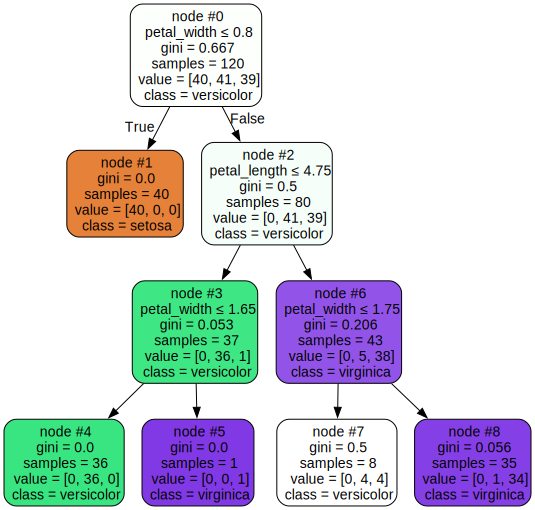

In [88]:
os.environ['PATH'] += os.pathsep + str(Path('.').resolve() / Path('Graphviz-12.1.2-win32/bin/'))
visualisointi = tree.export_graphviz(classifier, 
                                     feature_names=colnames[:4], 
                                     class_names=classifier.classes_,
                                     filled=True, 
                                     node_ids=True, 
                                     rounded=True,
                                     special_characters=True)
graph = graphviz.Source(visualisointi)
graph

## 5. Evaluointi/Arvionti

Miten tulosta voi tulkita? Onko jotain yllättävää?

Onko malli toimiva vai pitääkö mallia kehittää edelleen?


In [89]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [90]:
#oikeasti ennusteet lasketaan X-testti joukosta, ei X-opetusjoukosta
Y_pred = classifier.predict(X_test)
Y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [91]:
cm = confusion_matrix(Y_test, Y_pred)
#cm = confusion_matrix(Y, Y_pred, normalize='all')
#oikeasti ei Y vaan Y_test
print('Sekaannusmatriisi:', cm)

Sekaannusmatriisi: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [92]:
tarkkus = accuracy_score(Y_test,Y_pred)
print("Tarkuus on laskettu opetusjoukosta = %.3f" % tarkkus)

Tarkuus on laskettu opetusjoukosta = 1.000


In [93]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



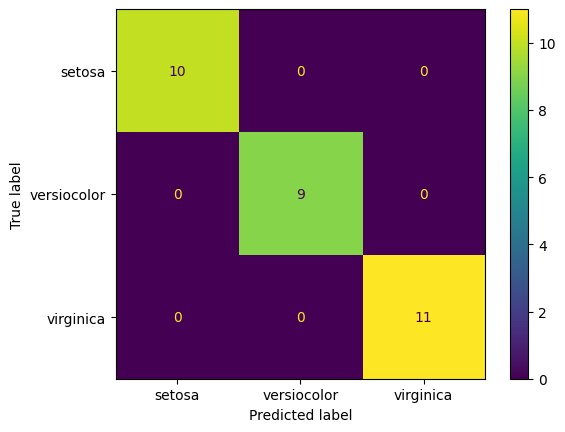

In [94]:
from sklearn.metrics import ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(cm, display_labels=['setosa', 'versiocolor', 'virginica'])
cmd.plot()
plt.show()

In [95]:
#ristinvalidointi
from sklearn.model_selection import cross_val_score
#kierosten määrä
k = 10

scores = cross_val_score(estimator=classifier,
                         X=X,
                         y=Y,
                         scoring='accuracy',
                         cv=k)
print("Tarkuudes on laskettu %d yksitäisellä kieroksella:" % k)
print('Tarkuudet', scores)

Tarkuudes on laskettu 10 yksitäisellä kieroksella:
Tarkuudet [1.         0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 1.         1.        ]


## Raportointi / Johtopäätökset / Täytäntöönpano

Miten tulokset vastaavat tavoitteeseen?

Mitä toimenpidesuosituksia?